In [7]:
%matplotlib inline

from modsim import *

init = State(BAC=0)
person = System(init = init, t0=0, t_end=12, 
                gender = .88, 
                weight = 130, 
                drink = 8,
                percent = .05, drinking_time = 1, dt = 1)

In [8]:
def run_simulation(state, system):
    unpack(system)
    #alc = drink*percent
    alc = 6*.6
    
    frame = TimeFrame(columns = init.index)
    frame.loc[t0] = init
    ts = linrange(t0, t_end-dt, dt)
    
    BAC = state.BAC

    
    for t in ts:
        
        if t < drinking_time:
            #drinking phase
            BAC += ((alc/(gender*weight*(drinking_time)))-((.2*BAC)/(BAC+1))) *(dt)
            frame.loc[t+dt] = BAC

            
        else:
            #recovery phase
            BAC += (-((.2*BAC)/(BAC+1))) * (dt)
            frame.loc[t+dt] = BAC

            
        system.results = frame

In [9]:
run_simulation(init, person)
person.results.BAC

0     0.000000
1     0.031469
2     0.025367
3     0.020419
4     0.016417
5     0.013187
6     0.010584
7     0.008489
8     0.006806
9     0.005454
10    0.004369
11    0.003499
12    0.002802
Name: BAC, dtype: float64

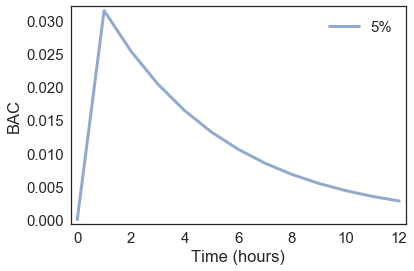

In [10]:

newfig()
plot(person.results.BAC, label='5%')
decorate(xlabel='Time (hours)',
         ylabel='BAC')